# Iris Flower Classification

### The Iris flower classification dataset comprises a total of 150 samples of Iris flowers, which are divided into three distinct species:

### Iris setosa
### Iris versicolor
### Iris virginica
This dataset is organized into three classes, each containing 50 instances, representing different types of Iris plants. Notably, one of these classes can be separated from the other two using a linear boundary, whereas the remaining two classes are not linearly separable from each other.

###  The dataset includes the following attributes for each Iris sample:

Sepal length in centimeters
Sepal width in centimeters
Petal length in centimeters
Petal width in centimeters
Class

# Importing libraries

In [14]:
# import libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import libraries for classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load Dataset

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# Drop id column
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# To display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# To display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
# To display no. of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Preprocessing the dataset

In [20]:
# Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
#Label encoding to convert class labels into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [22]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
# dealing with duplicate values
df.duplicated().sum()

3

In [24]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

<Axes: >

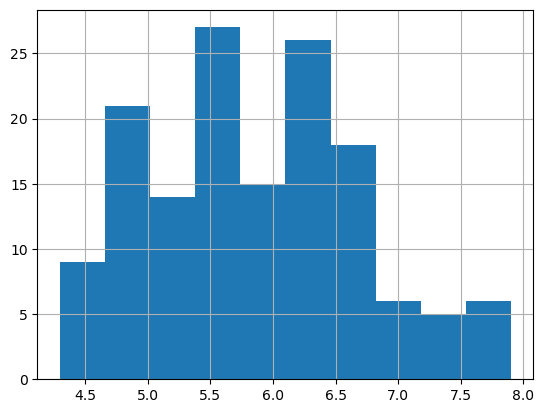

In [25]:
# Histograms
df['SepalLengthCm'].hist()

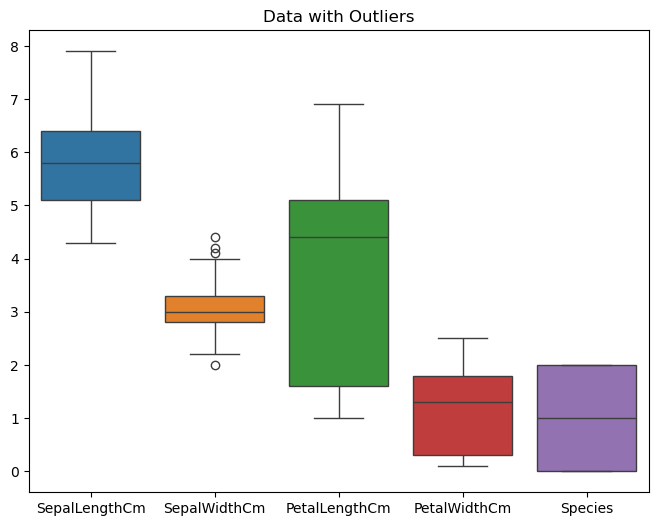

In [26]:
# Visualize the data before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title("Data with Outliers")
plt.show()

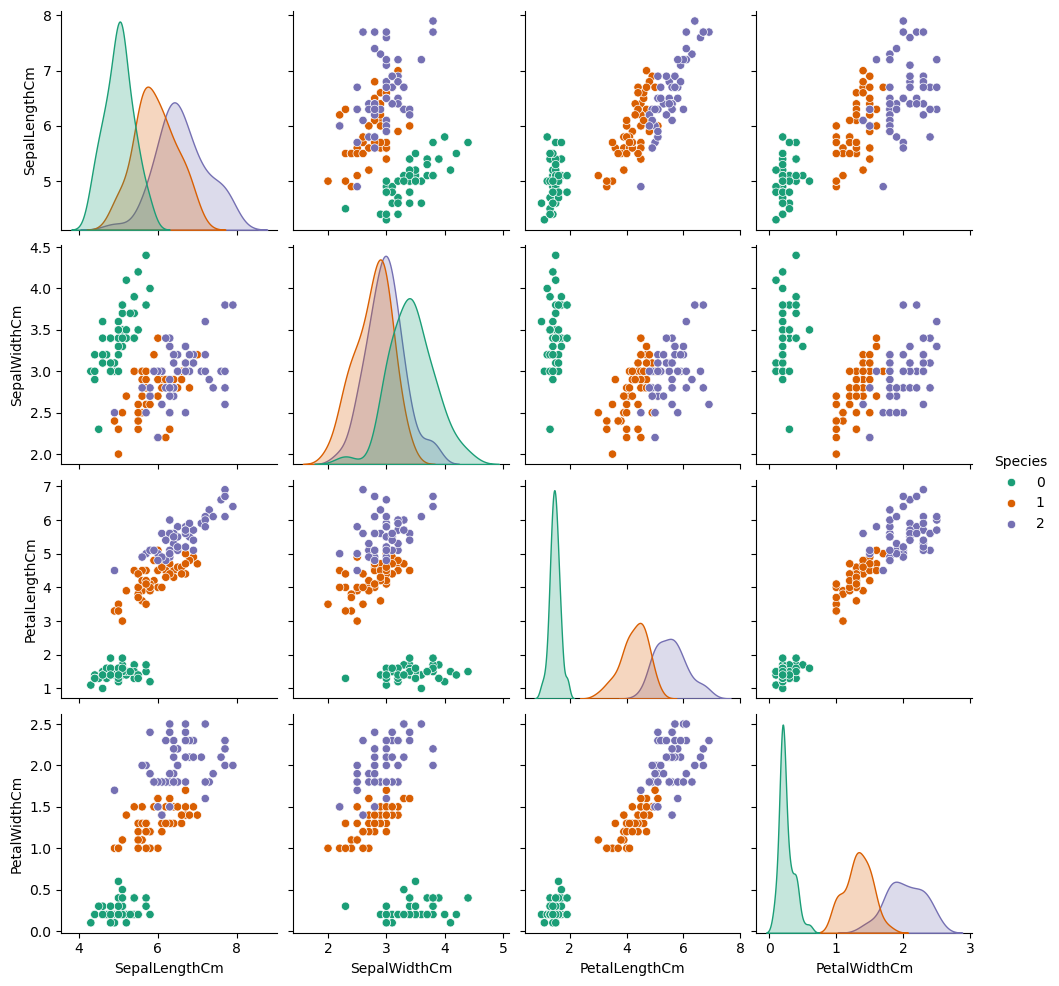

In [31]:
# Make Pair plot
sns.pairplot(df,hue= 'Species' , palette = 'Dark2', diag_kind = 'kde')
plt.show()

# correlation matrix

In [28]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

In [29]:
correlation_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


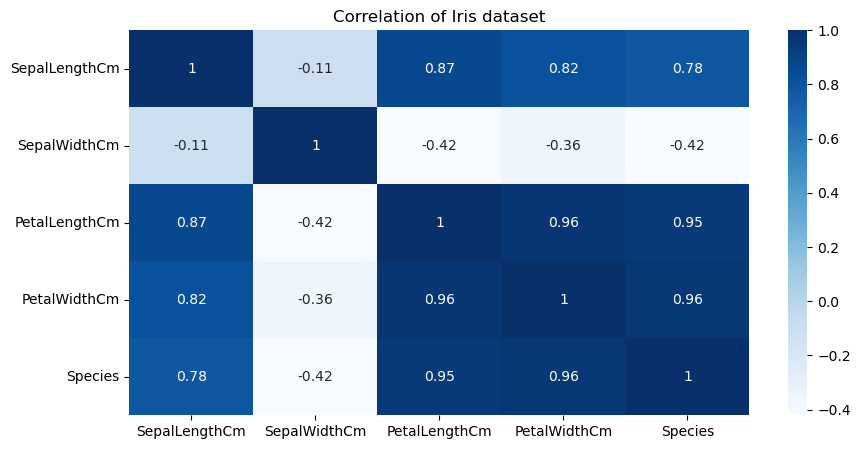

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True , cmap='Blues')
plt.title("Correlation of Iris dataset")
plt.show()

# Model Training

In [32]:
x = df.drop(columns=['Species'])
y = df['Species']

# Model 1

In [34]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [35]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
accuracy_logreg = model1.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", accuracy_logreg)

Accuracy (Logistic Regression):  95.55555555555556


# Model 2

In [36]:
# K-nearest neighbours Model(KNN)
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_knn = model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_knn)

Accuracy (KNN):  97.77777777777777


# model 3

In [37]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
accuracy_decision_tree = model3.score(x_test, y_test) * 100
print("Accuracy (Decision Tree): ", accuracy_decision_tree)


Accuracy (Decision Tree):  93.33333333333333


In [41]:
from sklearn.metrics import confusion_matrix
y_pred2 = model2.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred2)

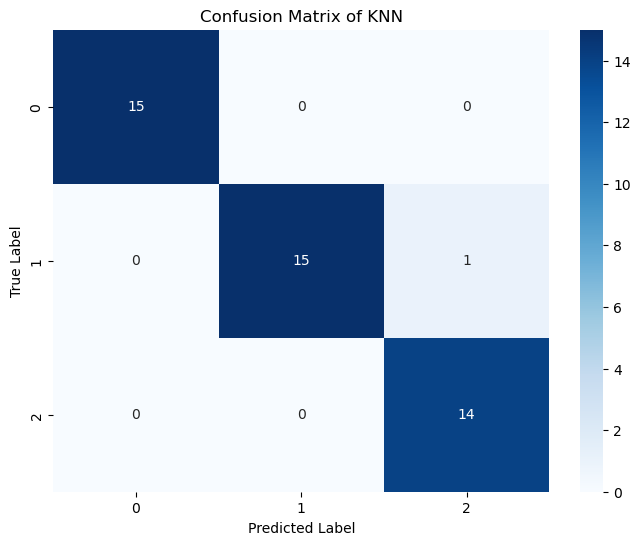

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()